<a href="https://colab.research.google.com/github/akheel143/Insurance-Forecast-by-using-Linear-Regression/blob/main/Insurance_Forecast_by_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
from google.colab import files
src=files.upload()

Saving insurance data.csv to insurance data.csv


In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [81]:
data=pd.read_csv('insurance data.csv')

In [82]:
data.head()
Y=data['charges']

In [83]:
data.shape

(1338, 7)

In [84]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [85]:
data['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [86]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [87]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [88]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [89]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


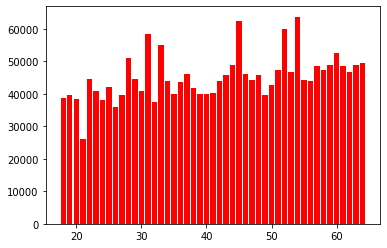

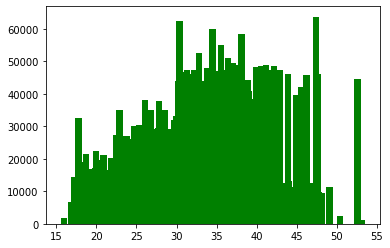

In [90]:
plt.bar(data['age'],data['charges'],color='red')
plt.show()
plt.bar(data['bmi'],data['charges'],color='green')
plt.show()

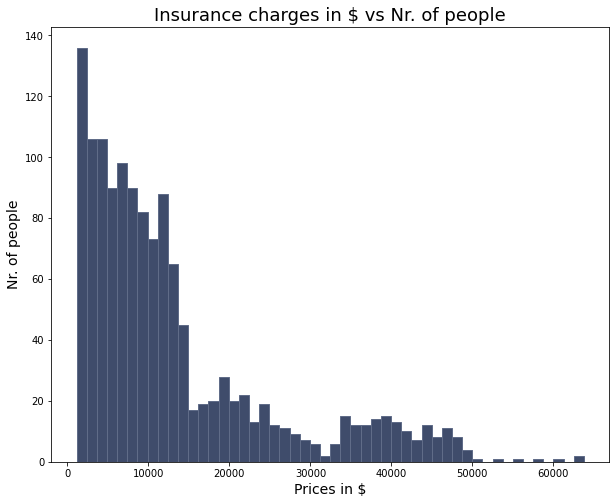

In [91]:
plt.figure(figsize=(10, 8))
plt.hist(data['charges'], bins = 50 ,color='#3f4c6b', ec='#606c88')
plt.title('Insurance charges in $ vs Nr. of people', fontsize=18)
plt.ylabel('Nr. of people', fontsize=14)
plt.xlabel('Prices in $', fontsize=14)
plt.show()

In [92]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [93]:
def encode(x):
    x=encoder.fit_transform(x)
    return x
data['sex']=encode(data['sex'])
data['smoker']=encode(data['smoker'])
data['region']=encode(data['region'])

In [94]:
data['age']=data['age'].apply(lambda x:'teen' if x<20 else('adult' if 20>=x<40 else 'old'))

In [95]:
data['age']=encode(data['age'])

In [96]:
data

,age,sex,bmi,children,smoker,region,charges
0,2,0,27.900,0,1,3,16884.92400
1,2,1,33.770,1,0,2,1725.55230
2,1,1,33.000,3,0,2,4449.46200
3,1,1,22.705,0,0,1,21984.47061
4,1,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,1,1,30.970,3,0,1,10600.54830
1334,2,0,31.920,0,0,0,2205.98080
1335,2,0,36.850,0,0,2,1629.83350
1336,1,0,25.800,0,0,3,2007.94500


BMI Categories:

1.   Underweight = <18.5
2.   Normal weight = 18.5–24.9
3.   Overweight = 25–29.9
4.   Obesity = BMI of 30 or greater


In [97]:
data['bmi']=data['bmi'].apply(lambda x:'Underweight' if x<18.5 else('Normal weight' if 18.5>=x<=24.9 else 'Overweight' if 25>=x<29.0 else 'Obesity'))

In [98]:
data['bmi']=encode(data['bmi'])

In [99]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,2,0,1,0,1,3,16884.92400
1,2,1,1,1,0,2,1725.55230
2,1,1,1,3,0,2,4449.46200
3,1,1,2,0,0,1,21984.47061
4,1,1,1,0,0,1,3866.85520
5,1,0,1,0,0,2,3756.62160
6,1,0,1,1,0,2,8240.58960
7,1,0,1,3,0,1,7281.50560
8,1,1,1,2,0,0,6406.41070
9,1,0,1,0,0,1,28923.13692


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



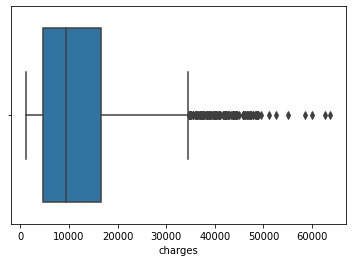

In [100]:
import seaborn as sns
sns.boxplot(data['charges'])

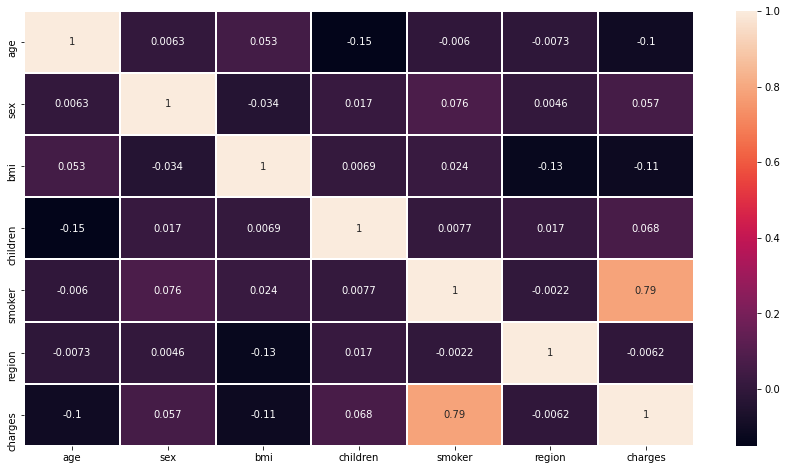

In [101]:
plt.figure(figsize = (15, 8))

sns.heatmap(data.corr(), annot = True, linewidths = 1)
plt.show()

In [102]:
import plotly.express as px
px.scatter(data_frame = data, x = 'age', y = 'charges', color = 'bmi', template = 'plotly_dark')

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop('charges',axis=1),Y,test_size=0.2,random_state=47)

In [104]:
x_train,y_train

(      age  sex  bmi  children  smoker  region
 75      1    1    1         0       0       1
 170     1    1    1         0       0       2
 1049    1    1    1         0       1       3
 955     1    1    1         1       0       2
 564     2    0    1         2       0       2
 ...   ...  ...  ...       ...     ...     ...
 691     1    1    1         1       0       3
 584     2    1    2         0       0       3
 1288    0    1    1         2       1       3
 327     1    1    1         2       1       1
 1159    1    0    1         0       0       3
 
 [1070 rows x 6 columns], 75      11356.6609
 170     13405.3903
 1049    39727.6140
 955      3875.7341
 564      2801.2588
            ...    
 691      8068.1850
 584      1242.8160
 1288    38344.5660
 327     42760.5022
 1159     3989.8410
 Name: charges, Length: 1070, dtype: float64)

In [106]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

In [107]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression(n_jobs=100)

In [108]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=100, normalize=False)

In [114]:
reg.score(x_train,y_train)

0.6299631318413079

In [115]:
reg.score(x_test,y_test)

0.7184393793235944

In [123]:
x_test.shape

(268, 6)

In [194]:
y_pred=reg.predict(x_test)
y=np.array(y_pred)